<a href="https://colab.research.google.com/github/mahmoudCW/Machine-Learning-Projects/blob/main/Lab_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB Data Preparation: In-Vehicle Coupon Recommendation**

**Group 3**


*   Meriem Miladi
*   Ibtihel Erraies
*   Mohamed Ali Besbes
*   Mahmoud Aziz Ammar
*   Salma Turki
*   Mohamed Yacine Ben Abda



In this lab, we will prepare and clean the dataset, which is essential for any data-driven project. Our goal is to create a reliable foundation for developing a machine learning model for coupon recommendations based on various driving scenarios.

This lab is divided into 4 key steps:



*   **Business Understanding**
*   **Data understanding**
*   **Data Exploration**
*   **Data Preparation**





# **Step 1 : Business Understanding**







### **Problem Statement**
The project aims to develop a coupon recommendation system for individuals in a vehicle. The main goal is to predict whether a person will accept a coupon while driving based on various factors, including driving scenarios, destination, time, weather, and more.

### **Stakeholders**
The primary stakeholders for this project include:
* The individuals in the vehicle who will receive coupon recommendations.
* Restaurants, bars, and businesses providing the coupons.
* Marketing teams interested in improving coupon acceptance rates.

### **Data Source**
The dataset used for this project was collected through a survey on Amazon Mechanical Turk.   
It contains information about different driving scenarios and whether the person will accept a coupon.

### **Success Criteria**
The success of the final project is evaluated based on the following criteria:
* Accuracy of coupon acceptance predictions.
* Increase in the utilization of coupons provided by partner businesses.
* Positive impact on revenue for partner restaurants and bars.

### **Data Exploration Questions**
* What are the most common driving scenarios mentioned in the dataset?
* Are there specific factors that strongly influence coupon acceptance?
* Are there any patterns in coupon acceptance based on different driving conditions?

# **Step 2: Data Understanding**


The survey presented many people with different scenarios and asked them whether or not they would accept the coupon if they were the driver in that presented scenario.

The dataset describes 12684 different data points, each characterized by 26 features that are either related to the person answering the survey, to the described situation, or to the offered coupon.



###1.   **Person-related features :**

- *Gender*
- *Age*
- *Marital Status*
- *has_Children* : Does the person have children or not?
- *Education*
- *Occupation*
- *Income*
- *Car*
- *Bar*: How many times a month does the person go to a bar?
- *CoffeeHouse* : How many times a month they go to a coffee house?
- *CarryAway* : How many times a month does the person order take-away food?
- *RestaurantLessThan20*: How many times a month does the person go to a restaurant with an average expense per person of less than 20 dollars?
- *Restaurant20To50*: How many times does the person go to a restaurant with average expense per person of 20 - 50 dollars every?

###2.   **Situation-related features (related to the conditions of the described situation)**
- *Destination* : Where is the driver going?
- *Passenger* : Is the driver alone or with friends/other passengers?
- *Time*
- *Weather* : The weather conditions at the time
- *Temperature* : The temperature at the time

###3. **Coupon-related features** :
- *Coupon* : Category of the coupon
- *Expiration*
- *toCoupon_GEQ5min*: Is the driving distance to use the coupon greater or equal than 5 minutes or not?
- *toCoupon_GEQ15min*: Is the driving distance to use the coupon greater or equal than 15 minutes or not?
- *toCoupon_GEQ25min*: Is the driving distance to use the coupon greater or equal than 25 minutes or not?
- *direction_same*: Is the restaurant/cafe/bar of the coupon in the same direction as driver’s current destination or not?
- *direction_opp*: Is the restaurant/cafe/bar of the coupon in the opposite direction as driver’s current destination or not?

###4. **Label** **:** **Y**
* *Y=1* if the person decides to accept the coupon

* *Y=0* if the person rejects it

# **Step 3: Data Exploration**
In the Data Exploration phase, we delve deeper into the dataset "**CouponRecommendation.csv**" to uncover insights, patterns, and potential anomalies. This exploration is essential to inform data preparation and understand the data's behavior.

* Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Initial Data Exploration
Here are the steps we've taken during the Data Understanding phase:

* Loading the Dataset: We loaded the dataset from the "CouponRecommendation.csv"
file to examine its contents.



In [ ]:
data = pd.read_csv("CouponRecommendation.csv")

In [ ]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


* Data Structure: We determined the size of the dataset (number of rows and columns) to understand its overall dimensions.



In [ ]:
data.shape

(12684, 26)

=> **The dataset contains a total of 12684 records and 25 features.**

* Data Types: We examined the data types of each feature to ensure they are correctly interpreted.



In [ ]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [ ]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

* Missing Values: We checked for missing values to identify any incomplete or erroneous data entries.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
data.isnull().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()
missing_values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

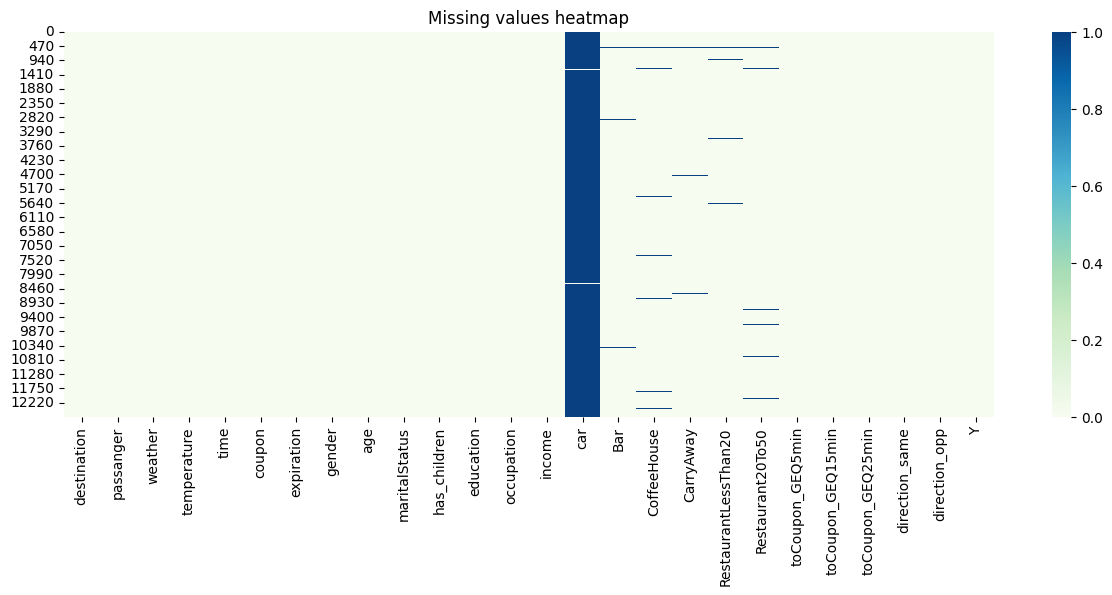

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(data=data.isnull(),cbar=True, cmap="GnBu")
plt.title('Missing values heatmap')
plt.show()

=> **There are  missing values, indicating that the dataset isn't totally complete in terms of data points.**

In [ ]:
for feature in data.columns:
    if data[feature].isnull().sum() > 0:
        print("In {}, mean of null value is : {}".format(feature, (data[feature].isnull().sum() / len(data)) * 100 ))

In car, mean of null value is : 99.14853358561967
In Bar, mean of null value is : 0.8435824660990224
In CoffeeHouse, mean of null value is : 1.7108167770419427
In CarryAway, mean of null value is : 1.1904761904761905
In RestaurantLessThan20, mean of null value is : 1.0249132765689057
In Restaurant20To50, mean of null value is : 1.490066225165563


* Summary Statistics: We calculated basic summary statistics, such as mean, standard deviation, and quartiles, for numerical features to get a sense of the data's distribution.

In [ ]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


=> these Summary statistics provide a basic understanding of the distribution of numerical features.

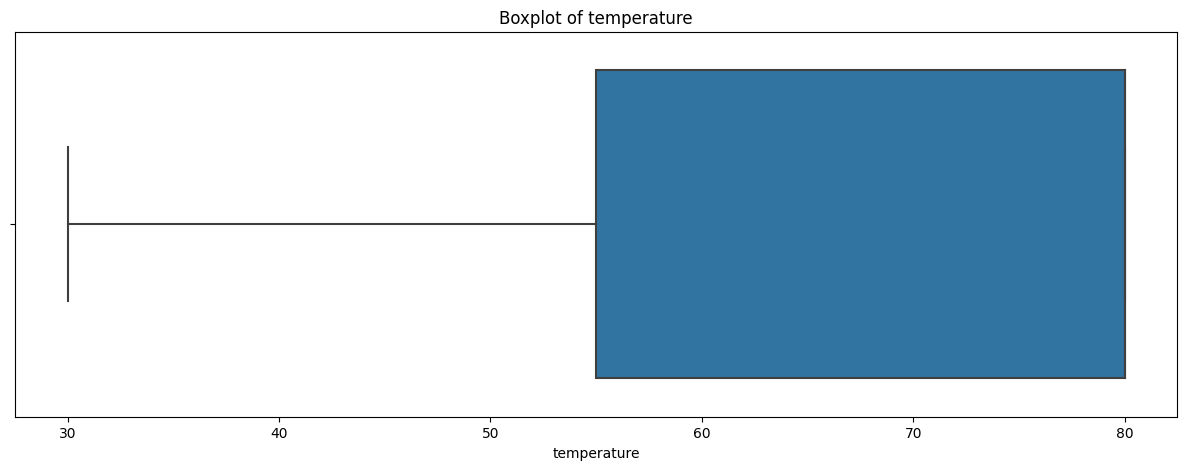

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=data["temperature"])
plt.title('Boxplot of temperature')
plt.show()

In [ ]:
# Counting the number of unique values in each integer column
data.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [ ]:
## Counting the number of unique values in each categorical (object) column
data.select_dtypes('object').nunique()

destination              3
passanger                4
weather                  3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
dtype: int64

## **Visualizations:**



### **Numerical Features**




* ###    **Visualisation:**




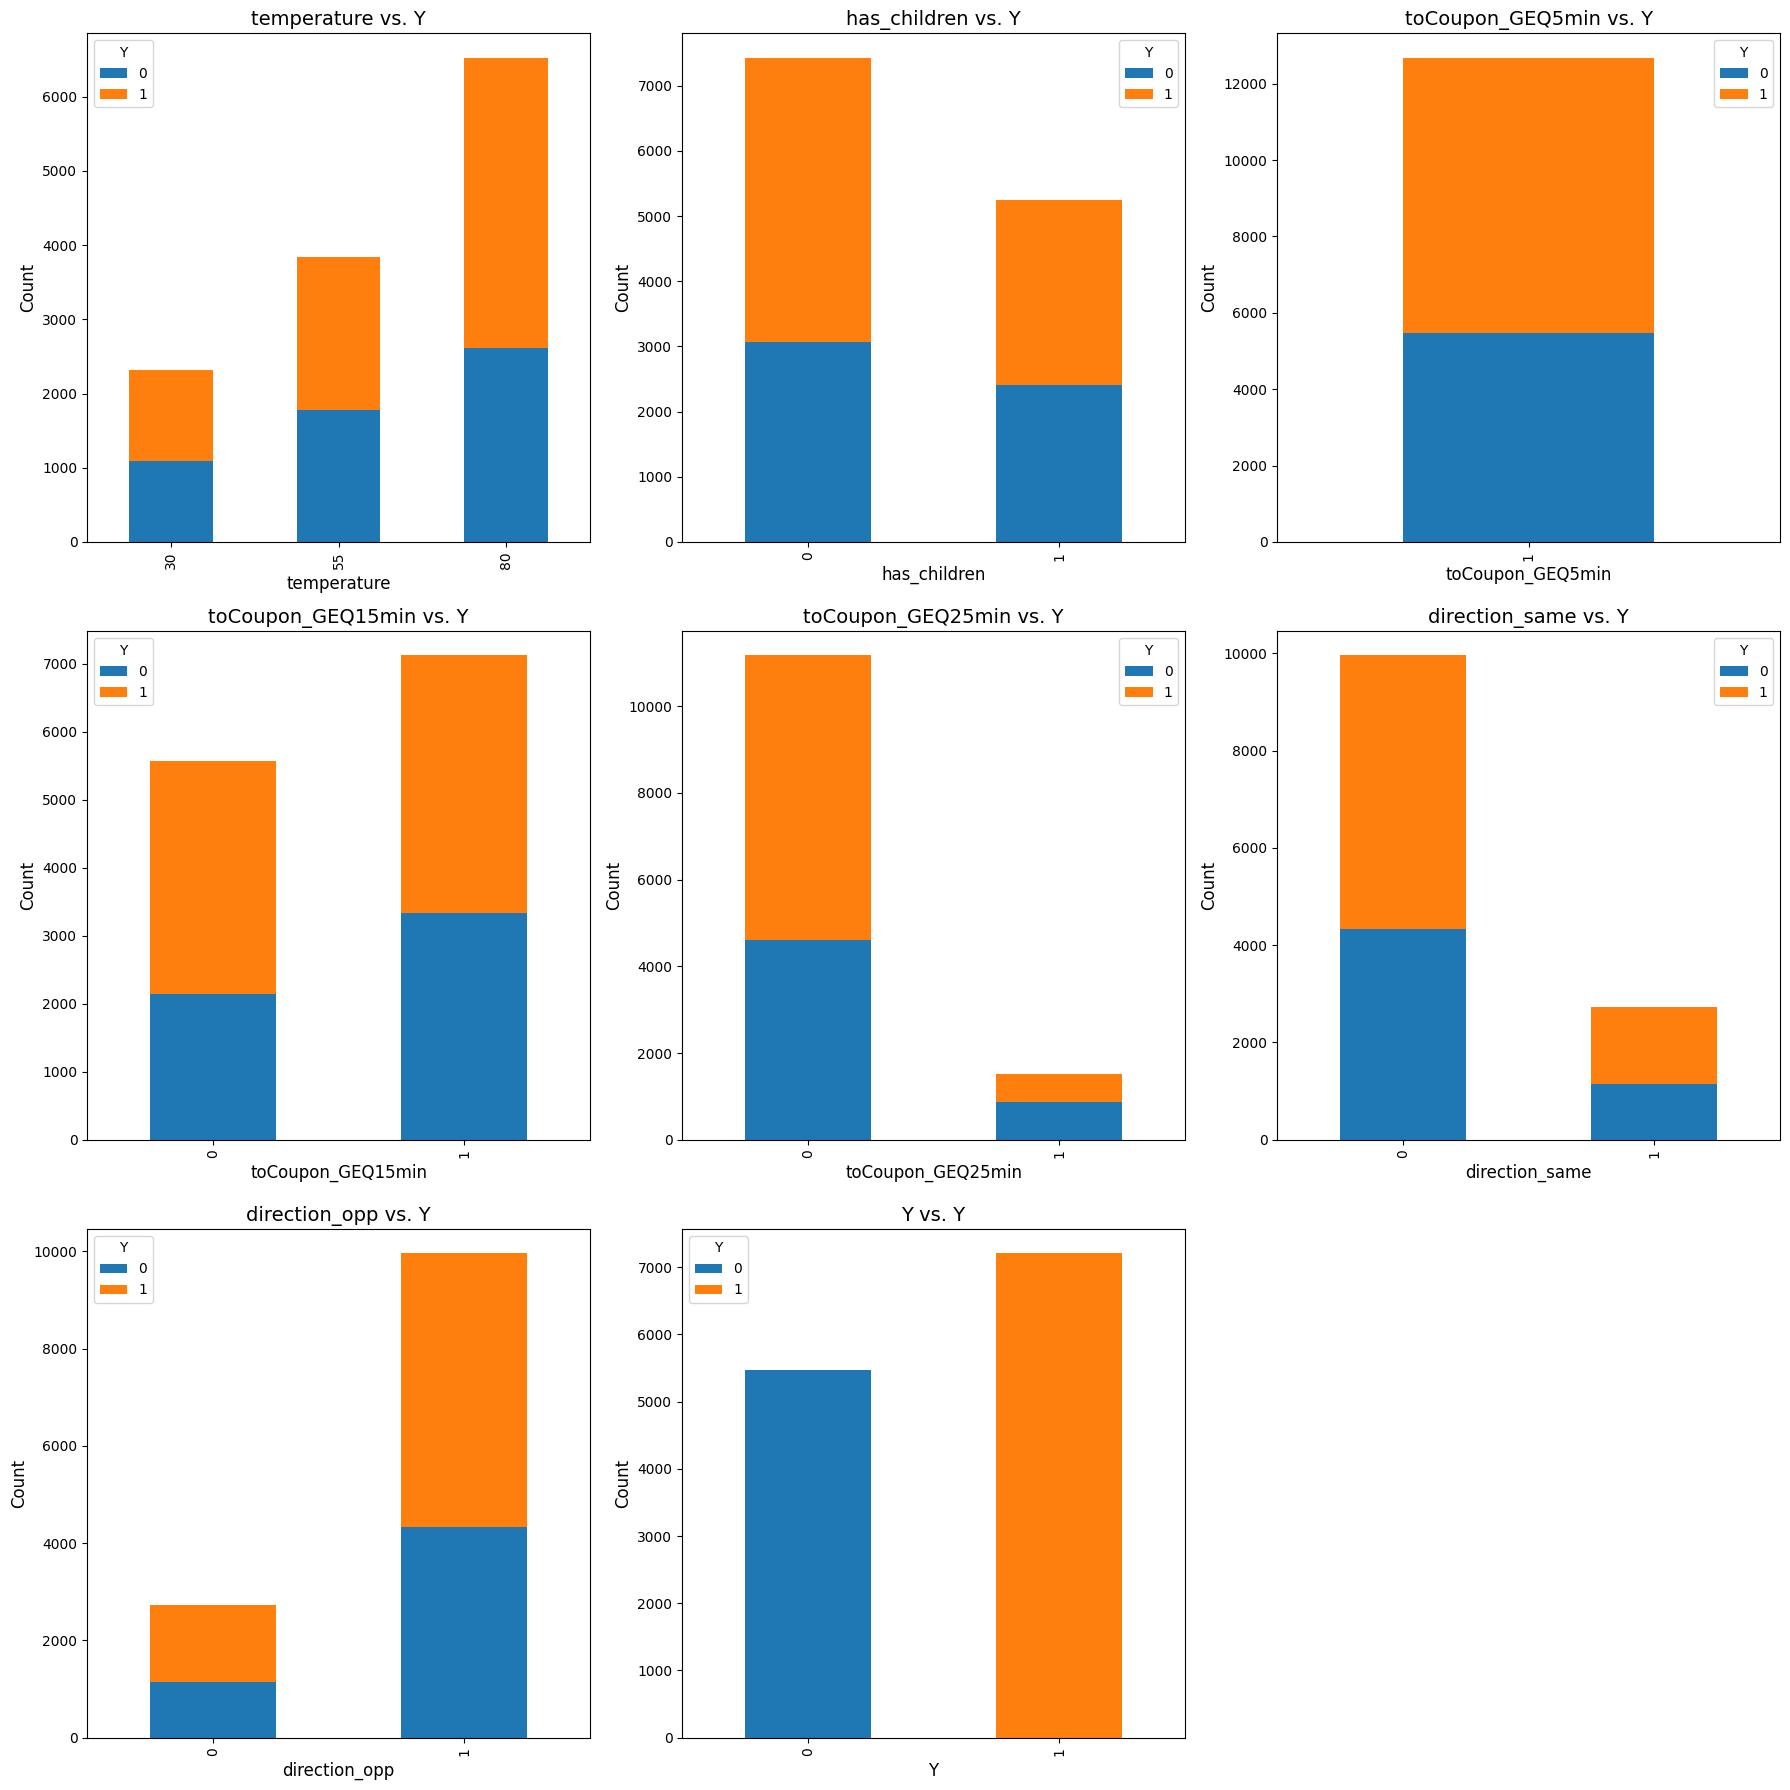

In [ ]:
# List of integer features to plot
integer_features = data.select_dtypes(include=['int64']).columns

# Define the number of histograms per row
histograms_per_row = 3

# Calculate the number of rows needed
num_features = len(integer_features)
num_rows = (num_features + histograms_per_row - 1) // histograms_per_row

# Increase the size of the figure
fig, axes = plt.subplots(num_rows, histograms_per_row, figsize=(18, 6 * num_rows))

for i, feature in enumerate(integer_features):
    row = i // histograms_per_row
    col = i % histograms_per_row

    # Create a cross-tabulation
    crosstab = pd.crosstab(data[feature], data['Y'])

    # Plot stacked histograms
    ax = crosstab.plot(kind='bar', stacked=True, ax=axes[row, col])

    ax.set_title(f'{feature} vs. Y', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Hide any empty subplots
for i in range(len(integer_features), num_rows * histograms_per_row):
    fig.delaxes(axes[i // histograms_per_row, i % histograms_per_row])

plt.tight_layout()
plt.show()


* ###    **Correlation Analysis:**

In [ ]:
#Exclude Non-Numerical Features
numerical_data = data.select_dtypes(include=[int, float])


#Compute correlations between numerical features to understand relationships
correlation_matrix = numerical_data.corr()
correlation_matrix


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


<Axes: >

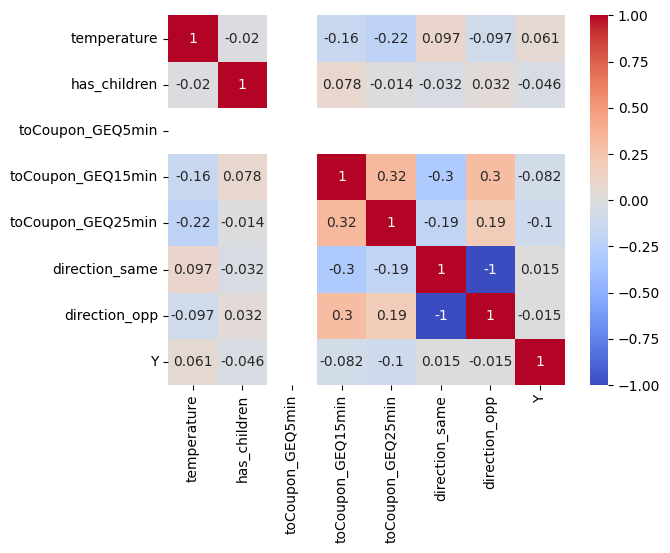

In [ ]:
#Visualize correlations using a heatmap.
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

### **Categorical Features Visualisation**

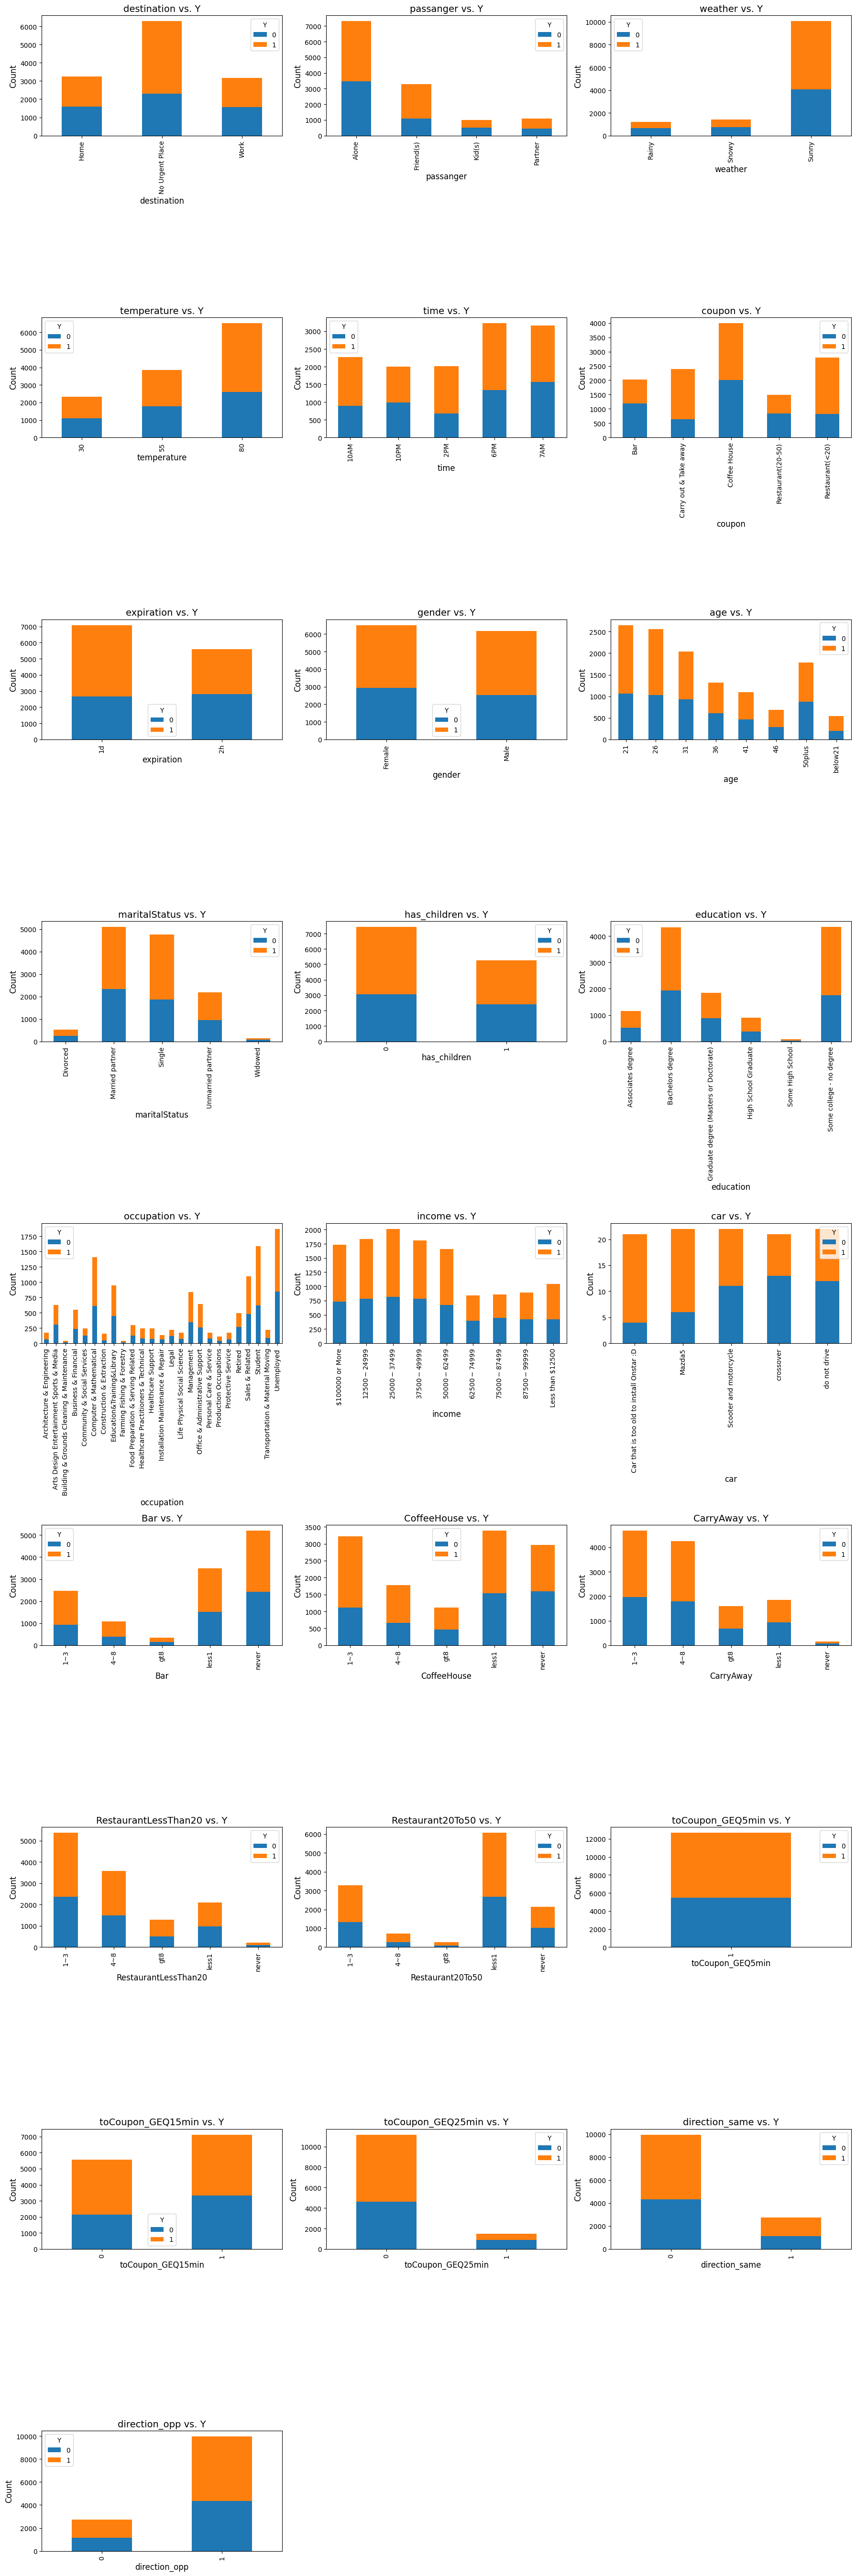

In [ ]:
# List of features to plot
features_to_plot = data.drop('Y', axis=1).columns

# Define the number of histograms per row
histograms_per_row = 3

# Calculate the number of rows needed
num_features = len(features_to_plot)
num_rows = (num_features + histograms_per_row - 1) // histograms_per_row

# Increase the size of the figure
fig, axes = plt.subplots(num_rows, histograms_per_row, figsize=(18, 6 * num_rows))

for i, feature in enumerate(features_to_plot):
    row = i // histograms_per_row
    col = i % histograms_per_row

    # Create a cross-tabulation
    crosstab = pd.crosstab(data[feature], data['Y'])

    # Plot stacked histograms
    ax = crosstab.plot(kind='bar', stacked=True, ax=axes[row, col])

    ax.set_title(f'{feature} vs. Y', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Hide any empty subplots
for i in range(len(features_to_plot), num_rows * histograms_per_row):
    fig.delaxes(axes[i // histograms_per_row, i % histograms_per_row])

plt.tight_layout()
plt.show()

### **Duplicate Records**

In [ ]:
data.duplicated().sum()

74

=> The dataset contains 74 duplicate records

# **Step 3: Data Preparation**

In [ ]:
# Dropping the 'Y' column
data.drop('Y', inplace=True, axis=1)

Converting features from "object" to "category"

In [ ]:
# Converting features from "object" to "category" type enhances memory efficiency, processing speed, and model performance in machine learning by optimizing data representation.
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype('category')

Dropping the 'car' column because it had a high percentage of missing values, specifically 99.15%, making it impractical for meaningful analysis. Removing this column ensures a cleaner and more focused dataset for further processing

In [ ]:
# Dropping the 'car' column due to a high mean of null values (99.15%)
data.drop('car', inplace=True, axis=1)

Dropping the 'toCoupon_GEQ5min'column because it has a single unique value for all rows, making this column irrelevant for our visualization

In [ ]:
# Dropping the 'toCoupon_GEQ5min' column due to an unique value for all rows
data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

### **Handling Missing Values:**

We will fill missing values in each selected column with the most frequent value of that column

In [ ]:
# 1. Identify missing values in the dataset
missing_data = data.isnull().sum()

# Fill missing values in each selected column with the most frequent value of that column

for x in data.columns[data.isna().any()]:
    data = data.fillna({x: data[x].value_counts().idxmax()})

In [ ]:
# Test the filling result
data.isnull().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
Bar                     False
CoffeeHouse             False
CarryAway               False
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
dtype: bool

### **Encoding Categorical Features:**


###**Ordinal Encoding**
Ordinal encoding is used to convert ordinal features into numerical representations by assigning unique numerical values based on a predefined order or ranking.

In [ ]:
# Define a mapping from 'Sunny' to 1, 'Rainy' to 2, 'Snowy' to 3
weather_mapping = {'Sunny': 1, 'Rainy': 2, 'Snowy':3}

# Use the map function to decode the 'weather' column
# The map function applies the mapping defined in weather_mapping to the 'weather' column
data['weather'] = data['weather'].map(weather_mapping)



In [ ]:
# Define a mapping from 'never' to 1, 'less' to 2, '1~3' to 3,'4~8 to 4' and 'gt8' to 5
mapping ={'never': 1, 'less1': 2, '1~3': 3, '4~8': 4, 'gt8': 5}

# Use the map function to decode the 'Restaurant20To50','RestaurantLessThan20','CarryAway','Bar' and 'CoffeeHouse' columns
# The map function applies the mapping defined in mapping these columns
data['Restaurant20To50'] = data['Restaurant20To50'].map(mapping)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].map(mapping)
data['CarryAway'] = data['CarryAway'].map(mapping)
data['Bar'] = data['Bar'].map(mapping)
data['CoffeeHouse'] = data['CoffeeHouse'].map(mapping)


In [ ]:
 # Define a mapping
 income_mapping ={ 'Less than $12500': 1, '$12500 - $24999': 2, '$25000 - $37499': 3, '$37500 - $49999': 4,
        '$50000 - $62499': 5, '$62500 - $74999': 6, '$75000 - $87499': 7, '$87500 - $99999': 8,
        '$100000 or More': 10}


# Use the map function to decode the 'income' column
# The map function applies the mapping defined in income_mapping to the 'income' column
data['income'] = data['income'].map(income_mapping)

In [ ]:
age_mapping ={ 'below21': 1, '21': 2, '26': 3, '31': 4, '36': 5, '41': 6, '46': 6, '50plus': 7 }
data['age'] = data['age'].map(age_mapping)


In [ ]:
education_mapping= { 'Some High School': 1, 'High School Graduate': 2, 'Some college - no degree': 3,
        'Associates degree': 5, 'Bachelors degree': 6,'Graduate degree (Masters or Doctorate)':7 }

data['education'] = data['education'].map(education_mapping)

In [ ]:
# Define a mapping from '1d' to 1, '2h' to 2
expiration_mapping = {'1d': 24, '2h': 2}

# Use the map function to decode the 'expiration' column
# The map function applies the mapping defined in expiration_mapping to the 'gender' column
data['expiration'] = data['expiration'].map(expiration_mapping)

convert **time** feature that contains values like "2AM," "4PM," "7AM," "8PM" to 24-hour format => numeric type

In [ ]:
# Function to extract the hour and convert to a numeric value
def convert_time_to_numeric(time_str):
    if time_str.endswith("AM"):
        return int(time_str.replace("AM", ""))
    elif time_str.endswith("PM"):
        return int(time_str.replace("PM", "")) + 12  # Convert PM hours to 24-hour format
    else:
        raise ValueError("Invalid time format")

# Apply the function to the "time" column in your principal dataset
data["time"] = data["time"].apply(convert_time_to_numeric)


In our scenario, we've adopted a dual encoding strategy. For ordinal features, we've manually encoded them by arranging categories in accordance with their natural order.

Conversely, for nominal features, we've applied frequency-based encoding. This combined approach enables us to accurately represent both ordinal and nominal data, thereby improving the overall quality of our modeling process.

In [ ]:
categorical_columns = ['destination','passanger', 'coupon', 'maritalStatus', 'occupation', 'gender']

# Initialize a dictionary to store the frequencies of each category
frequency_encoding = {}

# Iterate through each categorical column and calculate the frequencies
for column in categorical_columns:
    category_frequencies = data[column].value_counts() / len(data)

    # Create a DataFrame to store category frequencies
    category_frequencies = category_frequencies.reset_index()
    category_frequencies.columns = [column, 'frequency']

    # Sort the categories by frequency in descending order
    category_frequencies = category_frequencies.sort_values(by='frequency', ascending=False)

    # Assign encoding values to categories
    category_frequencies['encoding'] = range(len(category_frequencies))

    # Create a mapping of category to encoding
    encoding_map = category_frequencies.set_index(column)['encoding']
    frequency_encoding[column] = encoding_map

# Replace each category with its frequency-based encoding
for column, encoding_map in frequency_encoding.items():
    data[column] = data[column].map(encoding_map)



In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0,0,1,55,14,1,24,0,2,2,1,3,0,4,1,1,3,4,3,0,0,0,1
1,0,1,1,80,10,0,2,0,2,2,1,3,0,4,1,1,3,4,3,0,0,0,1
2,0,1,1,80,10,2,2,0,2,2,1,3,0,4,1,1,3,4,3,1,0,0,1
3,0,1,1,80,14,0,2,0,2,2,1,3,0,4,1,1,3,4,3,1,0,0,1
4,0,1,1,80,14,0,24,0,2,2,1,3,0,4,1,1,3,4,3,1,0,0,1


### **Scaling Numerical Features:**

Standardize all features to ensure they have a consistent scale.

In [ ]:
scaler = StandardScaler()

# Standardize each feature using a loop
for feature in data:
    data[feature] = scaler.fit_transform(data[[feature]])

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,-0.911583,-0.716684,-0.478872,-0.433430,0.033233,-0.394855,0.888114,-0.973698,-1.123227,1.237573,1.189378,-0.99078,-1.001804,-0.314446,-0.939649,-1.269355,-0.449373,0.779695,0.832465,-1.131581,-0.367745,-0.522967,0.522967
1,-0.911583,0.357072,-0.478872,0.871799,-0.706285,-1.119967,-1.125982,-0.973698,-1.123227,1.237573,1.189378,-0.99078,-1.001804,-0.314446,-0.939649,-1.269355,-0.449373,0.779695,0.832465,-1.131581,-0.367745,-0.522967,0.522967
2,-0.911583,0.357072,-0.478872,0.871799,-0.706285,0.330256,-1.125982,-0.973698,-1.123227,1.237573,1.189378,-0.99078,-1.001804,-0.314446,-0.939649,-1.269355,-0.449373,0.779695,0.832465,0.883720,-0.367745,-0.522967,0.522967
3,-0.911583,0.357072,-0.478872,0.871799,0.033233,-1.119967,-1.125982,-0.973698,-1.123227,1.237573,1.189378,-0.99078,-1.001804,-0.314446,-0.939649,-1.269355,-0.449373,0.779695,0.832465,0.883720,-0.367745,-0.522967,0.522967
4,-0.911583,0.357072,-0.478872,0.871799,0.033233,-1.119967,0.888114,-0.973698,-1.123227,1.237573,1.189378,-0.99078,-1.001804,-0.314446,-0.939649,-1.269355,-0.449373,0.779695,0.832465,0.883720,-0.367745,-0.522967,0.522967


<Axes: >

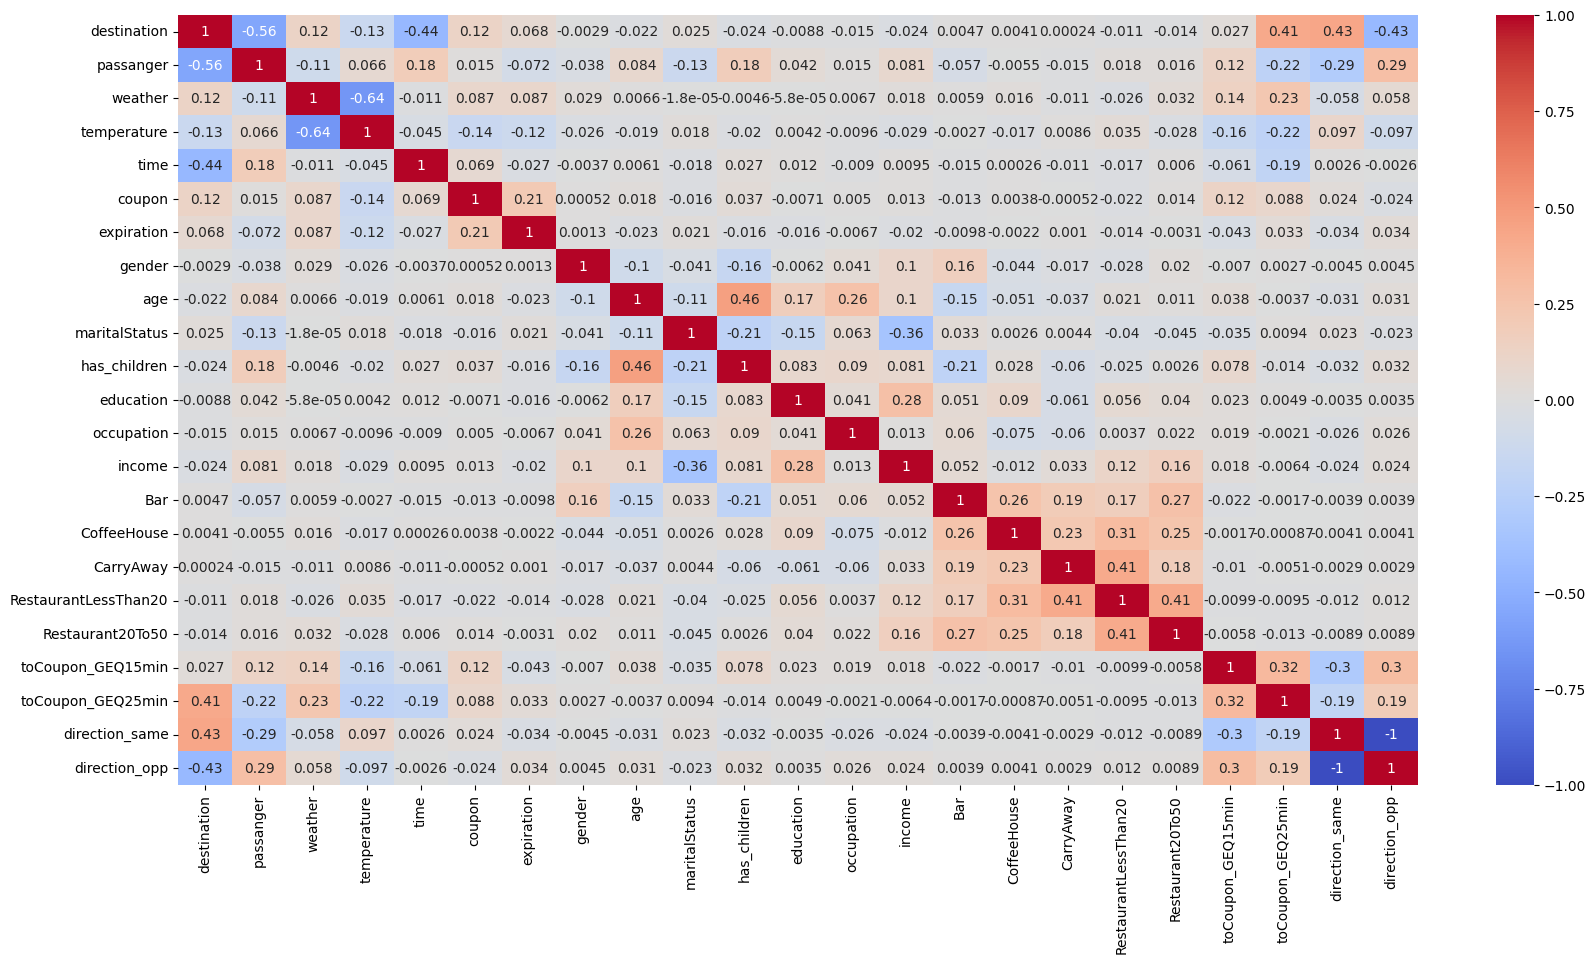

In [ ]:
#Compute correlations between numerical features to understand relationships
correlation_matrix =data.corr()
plt.figure(figsize=(20, 10))
#Visualize correlations using a heatmap.
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")



We choose to remove one of the two columns, '**direction_same**' or '**direction_opposite**,' as they both represent opposing aspects and exhibit high negative correlation.

=> This decision simplifies the dataset. By retaining just one column, we reduce redundancy and improve the efficiency of our data analysis and modeling processes.

In [ ]:
# Dropping the 'direction_opp' column
data.drop('direction_opp', inplace=True, axis=1)

### **export the prepared data to a CSV file**

In [ ]:
#data.to_csv('CouponRecommendation_Group3.csv', index=False)